In [ ]:
import glob
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold
from sklearn.svm import SVC


Mounted at /content/drive
Contents of the MFCC folder:
REC0.WAV
Testing_Soheyl_MFCC.ipynb
Sample rate:
16000
data (first 10 samples):
[85 86 86 86 86 86 86 85 85 86]

STFT magnitudes for the first few frames:
Frame 1 magnitudes (first 10 bins): [11049.49    8931.336   4652.1196  2314.3408  1862.5743  1386.6006
  1183.0724   989.4922   886.1011   774.5551]
Frame 2 magnitudes (first 10 bins): [2.2003547e+04 1.0979794e+04 7.5722595e+01 5.0628815e+01 3.5008312e+01
 9.6593752e+00 6.2405791e+00 5.3110161e+00 5.5928483e+00 9.8901815e+00]
Frame 3 magnitudes (first 10 bins): [2.2056973e+04 1.1027330e+04 8.0086212e+00 1.7988689e+01 1.2737457e+01
 7.9529467e+00 1.0474466e+01 1.8177937e+01 1.8912079e+01 7.8349972e+00]
Frame 4 magnitudes (first 10 bins): [2.2080562e+04 1.1071287e+04 7.5878784e+01 3.4833645e+01 1.1494637e+01
 1.2218577e+01 1.4154092e+01 4.1536568e+01 2.6129406e+01 2.7618480e+00]
Frame 5 magnitudes (first 10 bins): [2.18403184e+04 1.09247988e+04 5.61644020e+01 2.77025032e+01
 1.16981

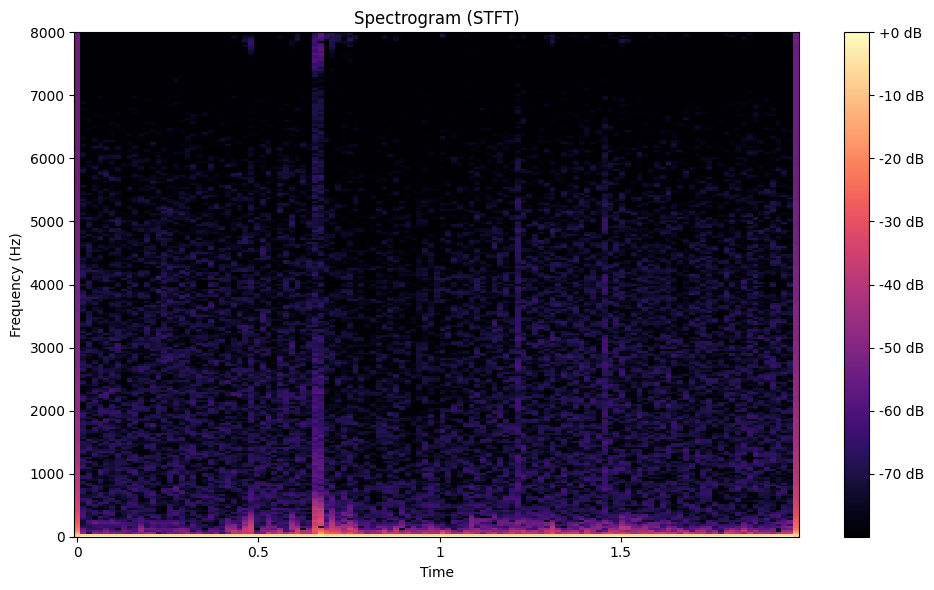

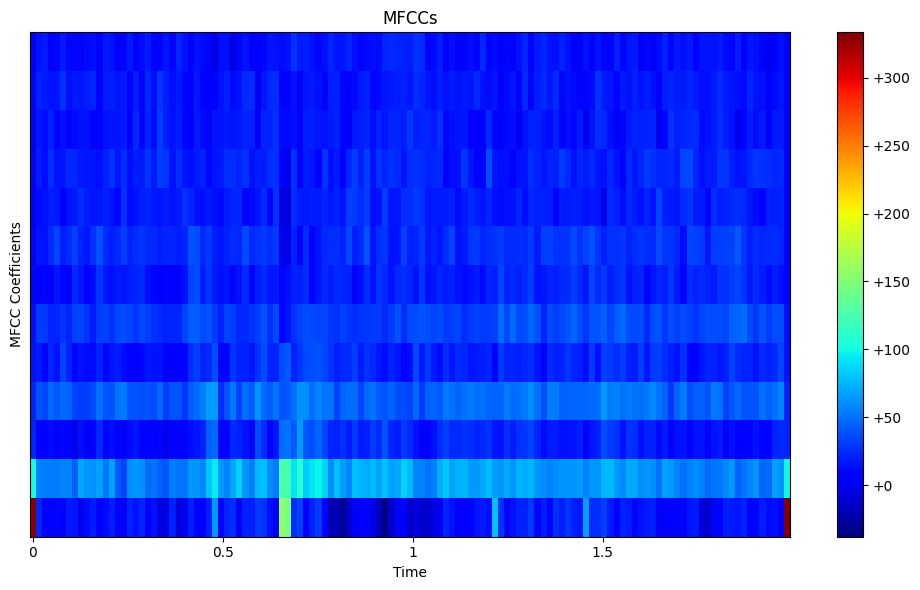


MFCC values for the first few frames (13 coefficients per frame):
Frame 1: [329.6838    100.08672    22.86964    22.861473   15.580675   13.750125
  10.545288    9.072132    7.8233886   6.4988046   5.6735477   6.038347
   4.602084 ]
Frame 2: [21.95623  55.126713  7.281042 39.04068  17.866444 29.578592  7.691606
 16.201416 12.236729 19.235336 15.724936 21.440285 15.317734]
Frame 3: [ 6.3280125 53.716454   7.6216645 34.27128    5.92369   29.52843
 10.506503  14.331038  14.340381  12.013929  12.410163  17.893223
 18.066868 ]
Frame 4: [ 5.2395506 53.664238  11.98992   46.92267   22.855835  21.647522
  4.529873  22.948706  19.507763  25.421463  20.700024  15.398176
  1.2052681]
Frame 5: [11.266389 54.457474  9.72141  40.758675 15.270725 22.850292 16.71177
 33.60003  17.503452 15.465591  8.370193 16.783966 11.068747]


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the MFCC folder
mfcc_folder_path = '/content/drive/My Drive/MFCC'

# List the contents of the folder
file_list = os.listdir(mfcc_folder_path)

# Print the file list
print("Contents of the MFCC folder:")
for file_name in file_list:
    print(file_name)

# Load the REC0.WAV file using scipy
wav_file = os.path.join(mfcc_folder_path, 'REC0.WAV')
sample_rate, data = wavfile.read(wav_file)

print("Sample rate:")
print(sample_rate)
print("data (first 10 samples):")
print(data[:10])

# Convert data to NumPy floating-point array explicitly
data = np.asarray(data, dtype=np.float32)

# Define parameters
window_size = 0.032  # 32ms window
hop_size = 0.016     # 16ms hop (to ensure overlap)
n_fft = 512          # FFT points

# Convert window and hop size to samples
frame_length = int(window_size * sample_rate)
hop_length = int(hop_size * sample_rate)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13, hop_length=hop_length, n_fft=n_fft)

# Compute STFT
stft_result = librosa.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=frame_length, window='hann')

# Convert to magnitude (amplitude spectrum)
stft_magnitude = np.abs(stft_result)

# Display STFT results for the first few frames
print("\nSTFT magnitudes for the first few frames:")
n_frame = 5
for frame_index in range(n_frame):
    print(f"Frame {frame_index + 1} magnitudes (first 10 bins): {stft_magnitude[:, frame_index][:10]}")

# Plot the STFT as a spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(stft_magnitude, ref=np.max),
                         sr=sample_rate, hop_length=hop_length,
                         x_axis='time', y_axis='hz')  # Use 'hz' for linear frequency scale
plt.ylim(0, 8000)  # Set Y-axis range to 0–8000 Hz
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT)')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate, hop_length=hop_length, cmap='jet')
plt.colorbar(format='%+2.0f')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Report MFCCs for the first few frames
print("\nMFCC values for the first few frames (13 coefficients per frame):")
for frame_index, mfcc in enumerate(mfccs.T[:n_frame]):  # Transpose to iterate over time frames
    print(f"Frame {frame_index + 1}: {mfcc}")
